In [39]:
from ase.io import read,write
import numpy as np
import matplotlib.pyplot as plt


In [15]:
structures = read("./mos2_interlayer_dset.xyz",index=":")
moire = read("591-6.01_deg-546_atoms.xsf",format="xsf")
structures[0].info

{'energy': 4.24654135394303,
 'il_dist': 2.1000000000000014,
 'lateral_dist_x': 0.0,
 'lateral_dist_y': 0.0,
 'cbm': 0.3163999999999998,
 'vbm': -0.0029000000000003467,
 'efermi': 2.3812,
 'bandgap': 0.31930000000000014,
 'bandgap_rel': -1.4975999999999998,
 'lj_energy': 0}

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


(-2.7921230791766822, 28.073800671421562, -14.869862375074948, 31.290798929817)

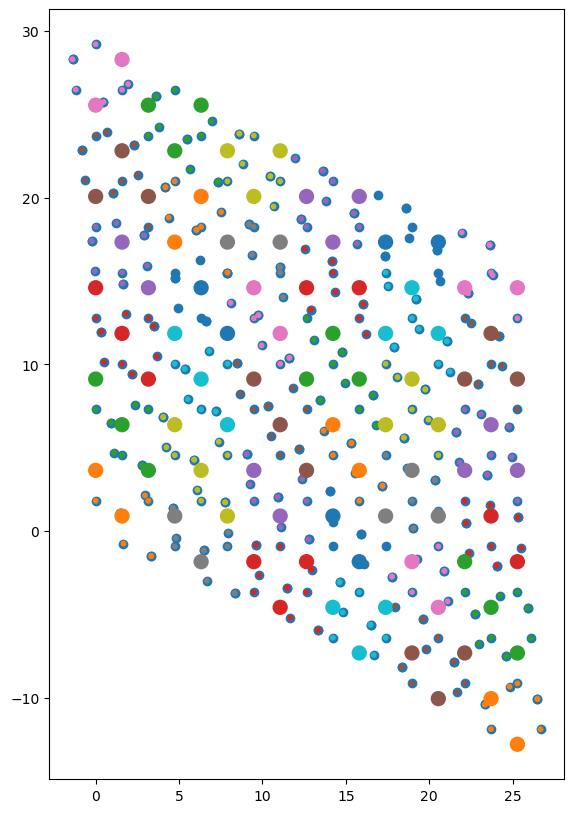

In [63]:
def create_grid(moire_atoms, n):
    """
    Subdivide the moiré cell into an n x n grid.
    
    Parameters:
    - cell_size: The size of the moiré cell.
    - n: The number of subdivisions along one axis.
    
    Returns:
    - A 2D array representing the grid points.
    """
    x = np.linspace(0, 1, n+1)
    print(x)
    y = np.linspace(0, 1, n+1)
    grid = np.meshgrid(x, y)

    moire_grid_atoms = []
    for i in range(n):
        grid_atoms_row = []
        for j in range(n):
            m1 = moire_atoms[np.logical_and(moire_atoms.get_scaled_positions()[:,0] < x[i+1], moire_atoms.get_scaled_positions()[:,0] > x[i] ) ]
            m1 = m1[np.logical_and(m1.get_scaled_positions()[:,1] < y[j+1], m1.get_scaled_positions()[:,1] > y[j] ) ]
            grid_atoms_row.append(m1)
        moire_grid_atoms.append(grid_atoms_row)


    return grid,moire_grid_atoms

n = 6
moire_grid,moire_grid_atoms = create_grid(moire,n)
moire_grid_atoms[0][0]
plt.figure(figsize=(10,10))
plt.scatter(moire.get_positions()[:,0],moire.get_positions()[:,1])
for i in range(n):
    for j in range(n):
        plt.scatter(moire_grid_atoms[i][j].get_positions()[:,0],
                    moire_grid_atoms[i][j].get_positions()[:,1], s = np.where(moire_grid_atoms[i][j].positions[:,2] <  0, 100, 10))
        
plt.axis('scaled')

[0.         0.33333333 0.66666667 1.        ]


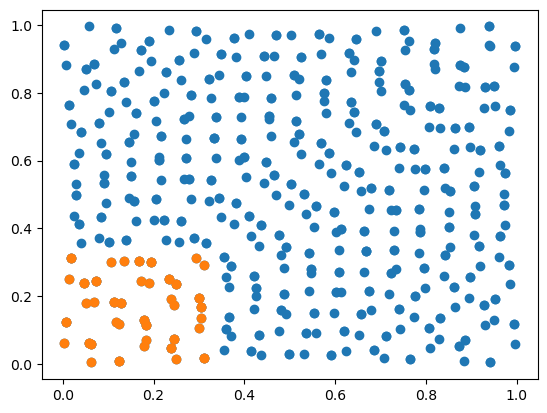

In [43]:
n = 3

x = np.linspace(0, 1, n+1)
print(x)
y = np.linspace(0, 1, n+1)

m1 = moire[np.logical_and(moire.get_scaled_positions()[:,0] < x[1], moire.get_scaled_positions()[:,0] > x[0] ) ]
m1 = m1[np.logical_and(m1.get_scaled_positions()[:,1] < y[1], m1.get_scaled_positions()[:,1] > y[0] ) ]

plt.scatter(moire.get_scaled_positions()[:,0],moire.get_scaled_positions()[:,1])
plt.scatter(m1.get_scaled_positions()[:,0],m1.get_scaled_positions()[:,1])

In [ ]:
def find_closest_match(grid_cell, database):
    """
    Find the closest matching atomic configuration in the database for the given grid cell.
    
    Parameters:
    - grid_cell: The atomic positions in the current grid cell.
    - database: A data structure holding atomic configurations and their energy values.
    
    Returns:
    - The energy value of the closest matching configuration.
    """
    # Logic to compare `grid_cell` with entries in `database` and find the closest match
    # This is highly dependent on the structure of your database and the data format
    closest_match_energy = ...  # Placeholder for actual logic
    return closest_match_energy

In [ ]:
def assign_energy_values(grid, database):
    """
    Assign energy values to each grid cell based on the closest match in the database.
    
    Parameters:
    - grid: The 2D array of grid points.
    - database: The database of atomic configurations and energy values.
    
    Returns:
    - A 2D array of energy values for each grid cell.
    """
    energy_grid = np.zeros_like(grid[0])  # Assuming grid[0] and grid[1] have the same shape
    for i in range(grid[0].shape[0]):
        for j in range(grid[0].shape[1]):
            grid_cell = ...  # Extract atomic positions for the grid cell at (i, j)
            energy_grid[i, j] = find_closest_match(grid_cell, database)
    return energy_grid

In [ ]:
from numpy.fft import fft2

def apply_fourier_transform(energy_grid):
    """
    Apply a Fourier transform to the grid of energy values.
    
    Parameters:
    - energy_grid: A 2D array of energy values for each grid cell.
    
    Returns:
    - The Fourier transform of the energy grid.
    """
    fourier_transform = fft2(energy_grid)
    return fourier_transform